Изображение успешно загружено.
Изображение сжато с использованием БПФ.
Изображение сжато с использованием SVD.
Время сжатия БПФ: 2.8901 секунд
Время сжатия SVD: 110.6022 секунд
Исходный размер изображения: 24772736 байт
Размер сжатого изображения БПФ (полученный массив): 24772736 байт
Размер сжатых данных SVD (U_k, s_k, Vh_k): 368 байт


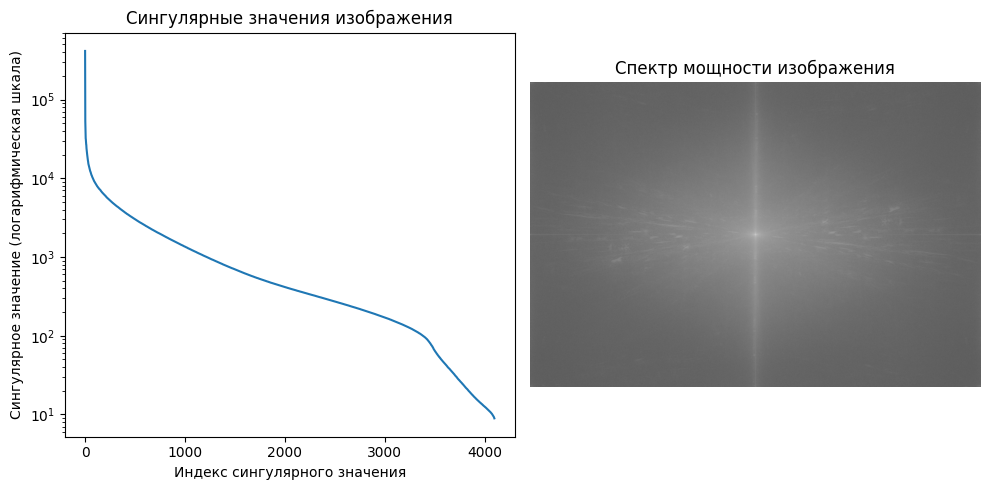

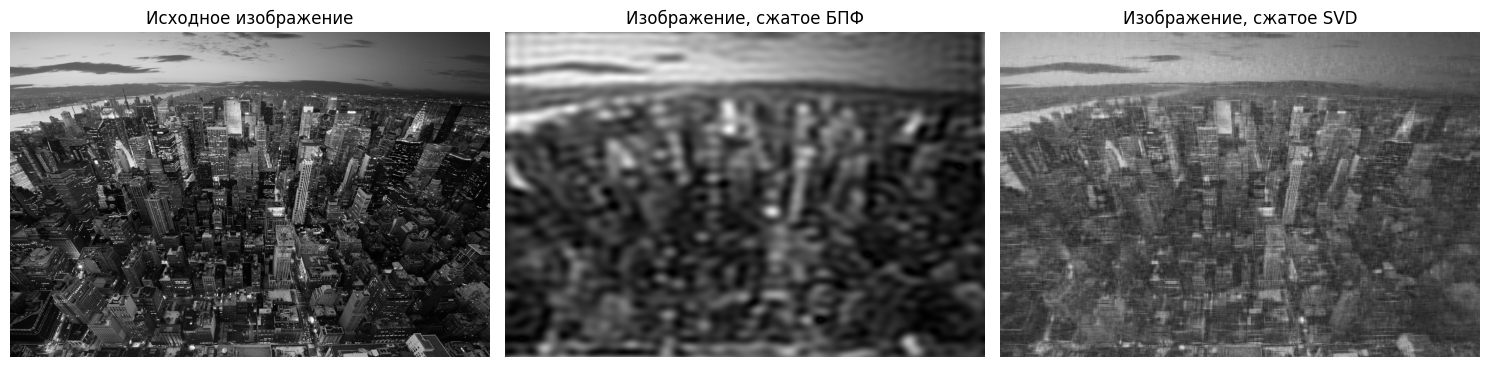


--- Метрики сжатия ---
Время сжатия БПФ: 2.8901 секунд
Время сжатия SVD: 110.6022 секунд
Исходный размер изображения: 24772736 байт
Размер сжатого изображения БПФ (полученный массив): 24772736 байт
Размер сжатых данных SVD (U_k, s_k, Vh_k): 368 байт


In [7]:
import cv2
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

# Загрузка изображения
image_path = '/content/image1 (1).jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is not None:
    print("Изображение успешно загружено.")
else:
    print("Ошибка загрузки изображения.")

# Сжатие изображения с использованием БПФ
start_time_fft = time.time()
# Выполнить БПФ
f = np.fft.fft2(img)

# Сдвинуть низкочастотную составляющую в центр
fshift = np.fft.fftshift(f)

# Создать маску для низкочастотной фильтрации (круговая маска)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask_radius = 30  # Отрегулируйте это значение для управления уровнем сжатия

# Создать круговую маску
mask = np.zeros((rows, cols), np.uint8)
center = (ccol, crow)
radius = mask_radius
cv2.circle(mask, center, radius, 1, -1)

# Применить маску
fshift_masked = fshift * mask

# Сдвинуть низкочастотную составляющую обратно
f_ishift = np.fft.ifftshift(fshift_masked)

# Выполнить обратное БПФ
img_compressed_fft = np.fft.ifft2(f_ishift)

# Получить действительную часть и преобразовать в соответствующий тип данных
img_compressed_fft = np.abs(img_compressed_fft)
img_compressed_fft = np.uint8(img_compressed_fft)
end_time_fft = time.time()
fft_execution_time = end_time_fft - start_time_fft

print("Изображение сжато с использованием БПФ.")

# Сжатие изображения с использованием SVD
start_time_svd = time.time()
U, s, Vh = np.linalg.svd(img)
k = 50  # Выберите количество сингулярных значений для сохранения (отрегулируйте для желаемого сжатия)
img_compressed_svd = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
end_time_svd = time.time()
svd_execution_time = end_time_svd - start_time_svd

print("Изображение сжато с использованием SVD.")

# Вычисление метрик
# Измерение времени сжатия БПФ
start_time_fft = time.time()
# Повторно запустить код сжатия БПФ для точного измерения времени
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask_radius = 30
mask = np.zeros((rows, cols), np.uint8)
center = (ccol, crow)
radius = mask_radius
cv2.circle(mask, center, radius, 1, -1)
fshift_masked = fshift * mask
f_ishift = np.fft.ifftshift(fshift_masked)
img_compressed_fft = np.fft.ifft2(f_ishift)
img_compressed_fft = np.abs(img_compressed_fft)
img_compressed_fft = np.uint8(img_compressed_fft)
end_time_fft = time.time()
fft_execution_time = end_time_fft - start_time_fft


# Вычисление исходного размера изображения
original_size = sys.getsizeof(img)

# Вычисление размера сжатых данных БПФ
fft_compressed_size = sys.getsizeof(img_compressed_fft)

# Вычисление размера сжатых данных SVD
svd_compressed_size = sys.getsizeof(U[:, :k]) + sys.getsizeof(s[:k]) + sys.getsizeof(Vh[:k, :])


print(f"Время сжатия БПФ: {fft_execution_time:.4f} секунд")
print(f"Время сжатия SVD: {svd_execution_time:.4f} секунд")
print(f"Исходный размер изображения: {original_size} байт")
print(f"Размер сжатого изображения БПФ (полученный массив): {fft_compressed_size} байт")
print(f"Размер сжатых данных SVD (U_k, s_k, Vh_k): {svd_compressed_size} байт")

# Визуализация результатов
# Построение графика сингулярных значений
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogy(s)
plt.xlabel("Индекс сингулярного значения")
plt.ylabel("Сингулярное значение (логарифмическая шкала)")
plt.title("Сингулярные значения изображения")

# Построение графика спектра мощности
plt.subplot(1, 2, 2)
power_spectrum = np.abs(fshift)**2
plt.imshow(np.log(power_spectrum + 1), cmap='gray') # Добавить 1, чтобы избежать log(0)
plt.title("Спектр мощности изображения")
plt.axis('off') # Отключить оси для графика изображения

plt.tight_layout()
plt.show()


# Представление результатов
# Отображение исходного изображения
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Отображение изображения, сжатого БПФ
plt.subplot(1, 3, 2)
plt.imshow(img_compressed_fft, cmap='gray')
plt.title('Изображение, сжатое БПФ')
plt.axis('off')

# Отображение изображения, сжатого SVD
plt.subplot(1, 3, 3)
plt.imshow(img_compressed_svd, cmap='gray')
plt.title('Изображение, сжатое SVD')
plt.axis('off')

plt.tight_layout()
plt.show()

# Вывод рассчитанных метрик
print("\n--- Метрики сжатия ---")
print(f"Время сжатия БПФ: {fft_execution_time:.4f} секунд")
print(f"Время сжатия SVD: {svd_execution_time:.4f} секунд")
print(f"Исходный размер изображения: {original_size} байт")
print(f"Размер сжатого изображения БПФ (полученный массив): {fft_compressed_size} байт")
print(f"Размер сжатых данных SVD (U_k, s_k, Vh_k): {svd_compressed_size} байт")